In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from tqdm import tqdm

sns.set(font_scale=1.3)

### Линейная регрессия

Рассмотрим данные `load_diabetes` из библиотеки `scikit-learn`, которые были созданы для изучения прогрессирования диабета у пациентов на основе медицинских показателей. Идея заключается в использовании десяти базовых физиологических параметров, таких как возраст, индекс массы тела (BMI), среднее артериальное давление и показатели анализа крови, чтобы предсказать, как будет развиваться заболевание через год после начального обследования. 

Этот набор данных стал популярным в машинном обучении для тестирования и сравнения алгоритмов регрессии, так как он представляет собой реальные данные, стандартизированные для удобства использования. Изначально данные были собраны и проанализированы в рамках исследования, предложенного Брэдли Эфроном и его коллегами в 2004 году.

#### 1. Загрузка данных

In [5]:
data = load_diabetes()
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

Функция `sklearn.datasets.load_diabetes()` возвращает словарь. В поле `data` записана матрица регрессоров, в которой данные предварительно центрированы и нормированы. В поле `target` записана мера прогрессирования заболевания в течение года. В поле `DESCR` можно прочитать подробнее о данных.

Посмотрим на описание датасета.

In [9]:
print(data['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Поле `data` содержит матрицу размера 442 $\times$ 10, где 442 — количество пациентов, а 10 — количество признаков (возраст, пол, и т.д.).

In [12]:
data['data'].shape

(442, 10)

Целевая переменная $-$ мера прогрессирования заболевания в течение года.

In [15]:
data['target'].shape

(442,)

Создайте матрицу регрессоров $X$ (data) и столбец наблюдений $y$ (целевая переменная).

In [17]:
X, y = data['data'], data['target']

#### 2. Обучение моделей

Разбейте данные случайно на две части — обучающую и тестовую в соотношении 80:20. Для этого используйте функцию [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

При разбиении датасета стоит зафиксировать случайность для воспроизводимости результатов, поставив `random_state=42` в функцию разбиения (глобально можно ставить любое число, необязательно именно 42). 

In [19]:
X_train, X_test, y_train, y_test =  train_test_split(X, y , test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(353, 10) (89, 10) (353,) (89,)


Создайте модель линейной регрессии из `sklearn` и обучите ее на обучающей части данных.

In [27]:
model = LinearRegression(fit_intercept=True) # объявляем модель
model.fit(X_train, y_train) # обучаем на признаке age

LinearRegression()

Посмотрите на результат обучения. Выведите коэффициенты перед признаками и свободный коэффициент.

In [30]:
print(model.coef_)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


Выполните предсказание модели на тестовой выборке.

In [32]:
y_pred = model.predict(X_test)

Реализуйте метрики **MSE**, **MAE**, **MAPE** без использования `sklearn` и других готовых реализаций.

Пусть $Y_1, ..., Y_n$ &mdash; истинные значения, а $\widehat{Y}_1, ..., \widehat{Y}_n$ &mdash; предсказания.


Метрика **MSE** (*mean squared error*) определяется как
$$MSE = \frac{1}{n}\sum_{i=1}^n \left(Y_i - \widehat{Y}_i\right)^2.$$

Метрика **MAE** (*mean absolute error*), определяемая как 
$$MAE = \frac{1}{n}\sum_{i=1}^n \left|Y_i - \widehat{Y}_i\right|.$$

Метрика **MAPE** (*mean absolute percentage error*), определяемая как 
$$MAPE = 100\% \cdot \frac{1}{n}\sum_{i=1}^n \left|\frac{Y_i - \widehat{Y}_i}{Y_i}\right|.$$


In [52]:
def MSE(y_true, y_pred):
    return 1/len(y_true)*sum((y_true - y_pred)**2)

def MAE(y_true, y_pred):
    return 1/len(y_true)*sum(abs(y_true - y_pred))

def MAPE(y_true, y_pred):
    return 1/len(y_true)*sum(abs(y_true - y_pred)/y_true)   # пришлось исправить формулу, то есть не умножать на 100 - иначе выводится ошибка при сверке с sklearn

Посчитайте **MSE**, **MAE**, **MAPE** на тестовой выборке и выведите с точностью до трех знаков после запятой.

In [55]:
print(f"MSE = {с}")
print(f"MAE = {round(MAE(y_test, y_pred), 3)}")
print(f"MAPE = {round(MAPE(y_test, y_pred), 3)}")

MSE = 2900.194
MAE = 42.794
MAPE = 0.375


Также ниже вы можете увидеть эти же метрики, реализованные в `sklearn.metrics`, и сравнить результаты вычислений с ними.

In [58]:
# Проверка правильности реализации функций
from sklearn.metrics import mean_squared_error, \
                            mean_absolute_error, \
                            mean_absolute_percentage_error

metrics_to_check = [(MSE, mean_squared_error, "MSE"),
                   (MAE, mean_absolute_error, "MAE"),
                   (MAPE, mean_absolute_percentage_error, "MAPE")]

for your_metrics, sklearn_metrics, name in metrics_to_check:
    assert np.abs(your_metrics(y_test, y_pred) - sklearn_metrics(y_test, y_pred)) < 1e-4, \
            f"Ошибка в реализации {name}"

#### 3. Интерпретация результатов

Существует область машинного обучения Explainable AI (XAI), которая занимается тем, что пытается разными способами понять, как работает модель, на какие признаки обращает внимание, насколько является устойчивой... То есть пытается интерпретировать работу модели. Это очень актуальная задача, поскольку таким образом мы можем:
- узнавать новую информацию о наших данных;
- понимать, умеет ли модель обращать внимание на действительно важные признаки;
- находить слабости модели;
- валидировать ее работу и т. д.

Сам подход имеет широкое распространение в сфере бизнеса, поскольку модели, используемые для принятия важных решений, таких как постановка медицинского диагноза, решение о выдаче кредита, беспилотное управление транспортом и т.п., должны соответствовать ГОСТ 59276-2020, регулирующему доверие к ИИ и объяснимости их результатов. Однако не меньший интерес область вызывает и в науке, например, чтобы понимать важность разных генов для формирования фенотипа и формулировать новые гипотезы.

Линейные модели являются одними из самых интерпретируемых, так как мы можем получить коэффициент каждого из признаков и рассматривать его как изменение значения таргета при изменении значения признака на единицу (когда все остальные признаки неизменны). Мы легко и четко понимаем, как ведут себя предсказания модели.

***Чтобы коэффициенты разных признаков можно было сравнивать между собой, необходимо их привести к одному масштабу, что чаще всего делается с помощью нормализации (вычитаем среднее и делим на стандартное отклонение).***

Проверьте, что в нашем датасете все признаки уже имеют одинаковое среднее и дисперсию.

In [138]:
# выводим признаки их среднее и дисперсию
for i in range (10):
    print(data['feature_names'][i], data['data'][:, i].mean(axis = 0), data['data'][:,i].var(axis = 0))

age -2.511816797794472e-19 0.002262443438914029
sex 1.2307902309192911e-17 0.0022624434389140317
bmi -2.2455642172282577e-16 0.0022624434389140265
bp -4.7975700837874414e-17 0.002262443438914025
s1 -1.3814992387869595e-17 0.0022624434389140243
s2 3.918434204559376e-17 0.002262443438914029
s3 -5.7771786349272854e-18 0.002262443438914025
s4 -9.042540472060099e-18 0.002262443438914027
s5 9.293722151839546e-17 0.0022624434389140265
s6 1.1303175590075123e-17 0.002262443438914029


Запишите в переменную `feature_names` массив из названий признаков, а в `coefficients` коэффициенты обученной модели.

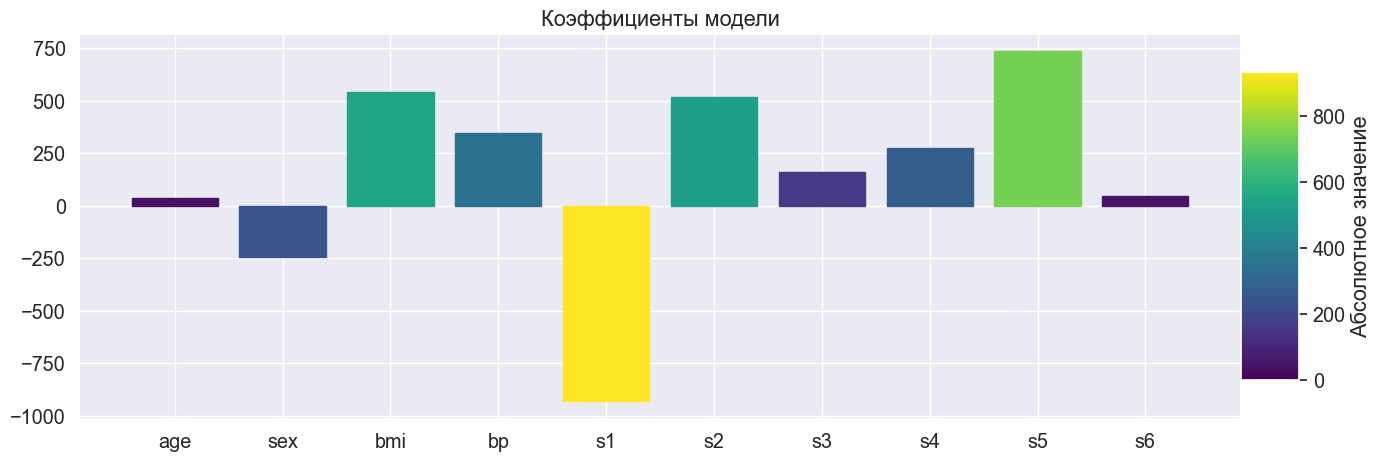

In [116]:
feature_names = data['feature_names']
coefficients = model.coef_

fig, ax = plt.subplots(figsize=(15, 5))
bars = plt.bar(feature_names, coefficients)

norm = mcolors.Normalize(vmin=0, vmax=max(abs(coefficients)))
cmap = plt.cm.viridis

for bar, value in zip(bars, coefficients):
    bar.set_color(cmap(norm(abs(value))))

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
cbar = plt.colorbar(sm, cax=ax.inset_axes([1, 0.1, 0.05, 0.8])) # Пришлось исправить, потому что на моей версии не строилось
cbar.set_label('Абсолютное значение')

ax.set_title('Коэффициенты модели');

Прочитайте описание признаков из датасета и интерпретируйте полученные коэффициенты модели.

In [119]:
print(data['DESCR'].split("baseline\n\n")[-1].split("\n\nNote")[0])

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level


**Вывод:**

Из полученых данных можно увидеть некоторую зависимость колличественного параметра (который как-то связан с диабетом) от 10 признаков. Видим, что при увеличении например индекса массы тела (bmi) у нас растёт колличественный показатель. А в случае признака s1 наоборот показатель падает, причём по абсолютным значениям сильнее всего.

Вспомним, что для линейных моделей мы умеем определять не только коффициенты, но и их статистическую значимость. Создайте датафрейм, в котором будут все признаки, а также колонка с таргетом, названная `target`. Используйте только тренировочные данные.

In [130]:
df = pd.DataFrame(X_train, columns = data['feature_names'])
df['target'] = y_train
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
1,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
2,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
3,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
4,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0
...,...,...,...,...,...,...,...,...,...,...,...
348,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920,134.0
349,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491,202.0
350,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078,148.0
351,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357,64.0


In [133]:
import statsmodels.formula.api as smf

statistical_model = smf.ols("target ~ " + " + ".join(feature_names), data=df).fit(cov_type="HC3")

print(statistical_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     56.66
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           1.57e-66
Time:                        18:02:48   Log-Likelihood:                -1906.1
No. Observations:                 353   AIC:                             3834.
Df Residuals:                     342   BIC:                             3877.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    151.3456      2.931     51.644      0.0

Сделайте выводы. Какие признаки являются статистически значимыми? Какая нулевая гипотеза проверяется? Как соотносятся между собой коэффициенты линейной регрессии, полученные с помощью `smf.ols()` и `LinearRegression()`?

**Вывод:** Из таблицы видим, что для признаков `sex`, `bmi`, `bp`, `s1`, `s5`  p-value < 0.05. Тогда при уровне значимости 0,05 эти признаки статичтически значимы. Проверяется нулевая гипотеза о том, что коэффициент равен 0. Если сравнить с коэффициентами выше, то увидим, что они полностью совпадают.

#### 4. Различные разбиения

Попробуйте разные разбиения данных на тренировочную и тестовую выборки, изменяя параметр `random_state`. Для каждого из разбиений обучите модель и получите метрики качества. Визуализируйте результаты, например, вы можете использовать гистограмму или боксплот. Меняются ли эти метрики, если менять разбиение данных? 

In [143]:
mse = []
mae = []
mape = []

for state in tqdm(np.arange(10000)):

    # разбиение данных
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=state)
    
    # обучение модели
    model = LinearRegression(fit_intercept=True) # объявляем модель
    model.fit(X_train, y_train) # обучаем на признаке age

    # предсказание модели
    y_pred = model.predict(X_test)

    # подсчет метрики на тестовой выборке
    mse.append(round(MSE(y_test, y_pred), 3))
    mae.append(round(MAE(y_test, y_pred), 3))
    mape.append(round(MAPE(y_test, y_pred), 3))

100%|██████████| 10000/10000 [00:25<00:00, 387.74it/s]


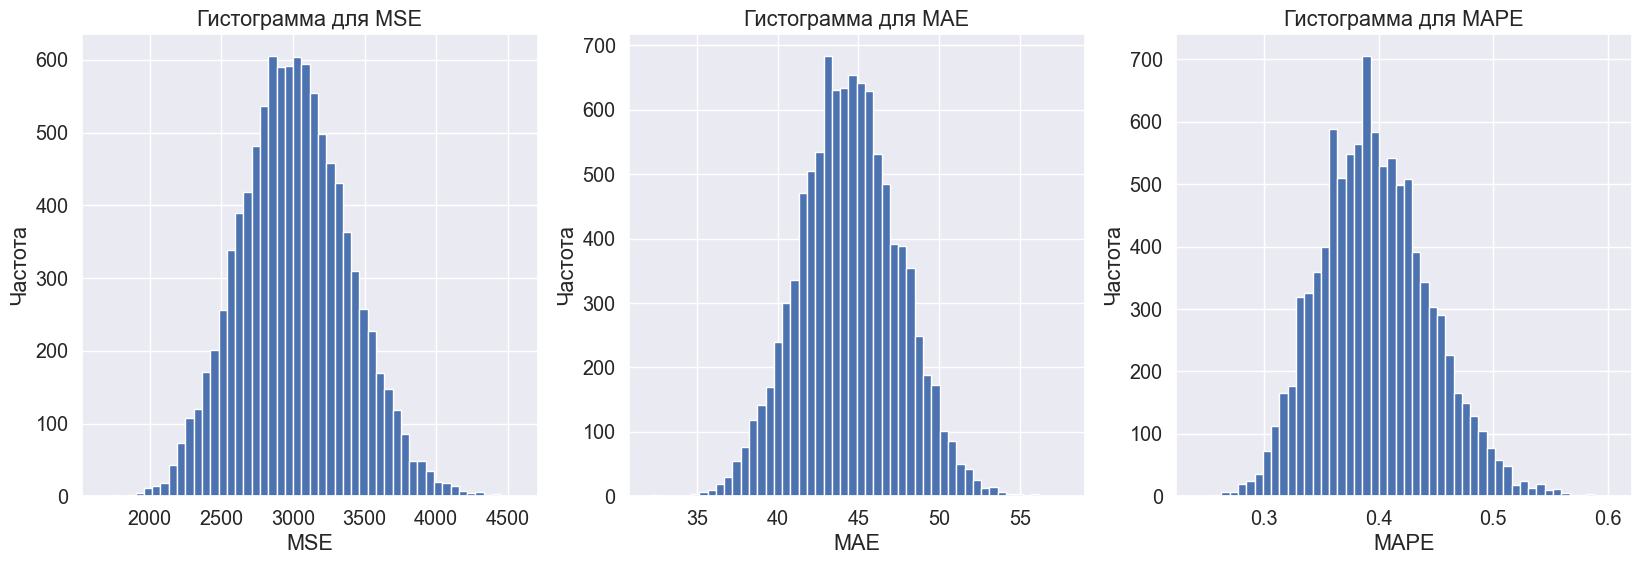

In [165]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(mse, bins=50)
plt.xlabel('MSE')
plt.ylabel('Частота')
plt.title('Гистограмма для MSE')

plt.subplot(132)
plt.hist(mae, bins=50)
plt.xlabel('MAE')
plt.ylabel('Частота')
plt.title('Гистограмма для MAE')

plt.subplot(133)
plt.hist(mape, bins=50)
plt.xlabel('MAPE')
plt.ylabel('Частота')
plt.title('Гистограмма для MAPE')
plt.show()

Сделайте выводы, а также порассуждайте о том:
- С чем может быть связан разброс метрик, если он присутствует? 
- Что может происходить с качеством модели и значениями метрик, если увеличить или уменьшить размер только обучающей выборки?
- Что может происходить с качеством модели и значениями метрик, если увеличить или уменьшить размер только тестовой выборки?
- Что может происходить с качеством модели и значениями метрик, если изменять пропорцию трейна и теста в данных (параметры `test_size` и `train_size` в функции `train_test_split`)?

**Вывод:**
- разброс метрик может быть связан например с ситуацией, когда данные в целом не очень однородные, тогда в тренировочную выборку могут попасть значения из одной области, а тогда на тестовой выборке, которая может сильно отличаться получатся сильно отличающиеся значения - в таком случае и оценки будут плохими
- Качество модели может увеличиться при увеличении обучающей выборки, так как модель сможет обучиться точнее (при маленькой может произойти переобучение)
- С увеличением выборки тестовой мы можем увеличить качество сверки нашей модели
- В зависимости от объёма наших данных мы можем варьировать наше соотношение, важно выделить досточно большую часть данных под более точное обучение и качественную сверку 